# Redes Neuronales II - Arquitectura, compilación, evaluación y mejora usando Keras

<img src="./img/keras_logo.jpg" width="150">

### Importamos librerías

In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
print(tf.__version__) # Versión de TensorFlow cargada

2.16.1


### Carga del dataset a analizar
Cargamos el dataset MINST con las imágenes de prendas de ropa

In [3]:
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Las imágenes de este dataset son matrices NumPy de 28 x 28 píxeles, con valores que van de 0 a 255. Las etiquetas son una matriz de enteros, que van de 0 a 9. Estos corresponden a la clase de ropa que representa la imagen.   
Dado que los nombres de clase no se incluyen con el conjunto de datos, podemos crear una lista con ellos para usarlos más adelante al visualizar las imágenes

In [4]:
class_names = ['Camiseta/Top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Deportiva', 'Bolso','Botín']

Vamos a proceder al escalado de los valores de entrada, las citadas matrices de 28 x 28, a valores en el rango 0 - 1

In [5]:
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 

train_images = train_images / 255.0 
test_images = test_images / 255.0

Comprobamos la forma (shape) de los datos escalados:

In [6]:
print("train_images.shape:",train_images.shape) 
print("len(train_labels:",len(train_labels)) 
print("test_images.shape:",test_images.shape) 
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


Revisamos también sus etiquetas

In [7]:
train_labels 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Mostramos unos ejemplos por pantalla, en concreto, las 50 primeras muestras del dataset

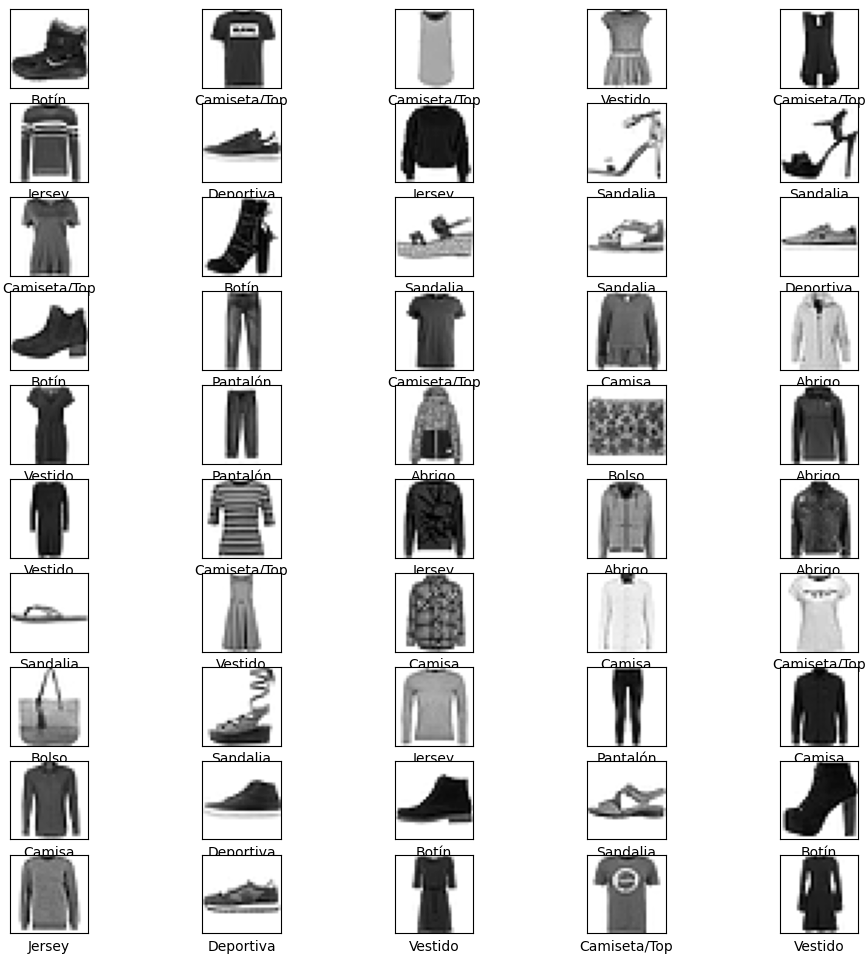

In [8]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary )
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construcción de la arquitectura del modelo  

Vamos a preprocesar los datos de entrada mediante el uso de la capa **Flatten()** que Keras nos facilita y que permite reconvertir las muestras de entrada de 28 × 28 a un vector (array) de 784 números (concatenando fila a fila).

In [11]:
# Importamos librería para montar estructura del modelo y capas.
from keras import Sequential
from keras.layers import  Dense, Flatten, Input

In [12]:
model = Sequential([ 
            Input(shape=(28,28)),
            Flatten(), 
            Dense(10, activation='sigmoid'),
            Dense(10, activation='softmax')
])

In [13]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

None


Compilamos el modelo

In [14]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Entrenamiento del modelo

In [15]:
model.fit(train_images,train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3784 - loss: 1.9736
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.6567 - loss: 1.2811
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.7072 - loss: 1.0300
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.7330 - loss: 0.8990
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7535 - loss: 0.8110


Evaluación del modelo

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7558 - loss: 0.7749
Test accuracy:  0.7577000260353088


Predicciones

In [17]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


En predictions se ha almacenado la predicción de la etiqueta para cada imagen en el conjunto de prueba. Se analiza la primera predicción:

In [18]:
predictions[5]

array([0.02224752, 0.71544033, 0.01330039, 0.1768491 , 0.03463461,
       0.00197572, 0.02547252, 0.00251099, 0.00294764, 0.00462121],
      dtype=float32)

Para ver que etiqueta tiene el valor de confianza más alto usamos la función **argmax()**

In [19]:
np.argmax(predictions[5])

1

Por tanto, nuestro modelo está más seguro de que esta imagen son unos pantalones y, al examinar la etiqueta correcta que le corresponde, tenemos que la clasificación es cierta:

In [20]:
test_labels[5]

1

### Visualización gráfica 

In [26]:
def plot_image(i, predictions_array, true_label, img): 
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.imshow(img, cmap=plt.cm.binary) 
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label: 
        color = 'blue' 
    else: 
        color = 'red' 
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color) 

def plot_value_array(i, predictions_array, true_label): 
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#007700") 
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array) 
    thisplot[predicted_label].set_color('red') 
    thisplot[true_label].set_color('blue')

Las etiquetas de predicción correcta se colorean de azul (para que se pueda ver en la edición en blanco y negro) y las etiquetas de predicción incorrecta se colorean de rojo (gris en la edición en blanco y negro). El número da el porcentaje (de 100) para la etiqueta predicha.

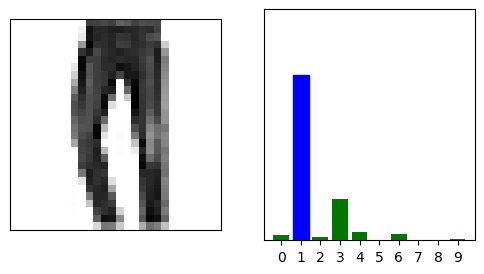

In [27]:
# Predicción para la imagen 5
i = 5 
plt.figure(figsize=(6,3)) 
plt.subplot(1,2,1) 
plot_image(i, predictions[i], test_labels, test_images) 
plt.subplot(1,2,2) 
plot_value_array(i, predictions[i], test_labels) 
plt.show()

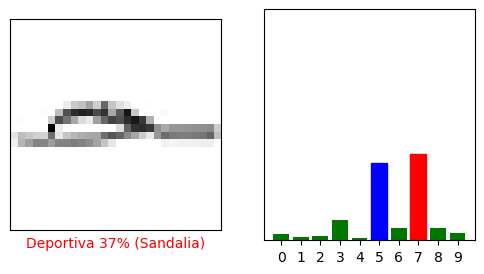

In [28]:
# Predicción para la imagen 8
i = 8
plt.figure(figsize=(6,3)) 
plt.subplot(1,2,1) 
plot_image(i, predictions[i], test_labels, test_images) 
plt.subplot(1,2,2) 
plot_value_array(i, predictions[i], test_labels) 
plt.show()

Visualizamos a continuación varias imágenes con sus predicciones. Para ello, se utiliza el código mostrado seguidamente. Se debe tener en cuenta que el modelo puede estar equivocado, incluso cuando tiene mucha confianza en la clasificación sobre una de las clases.

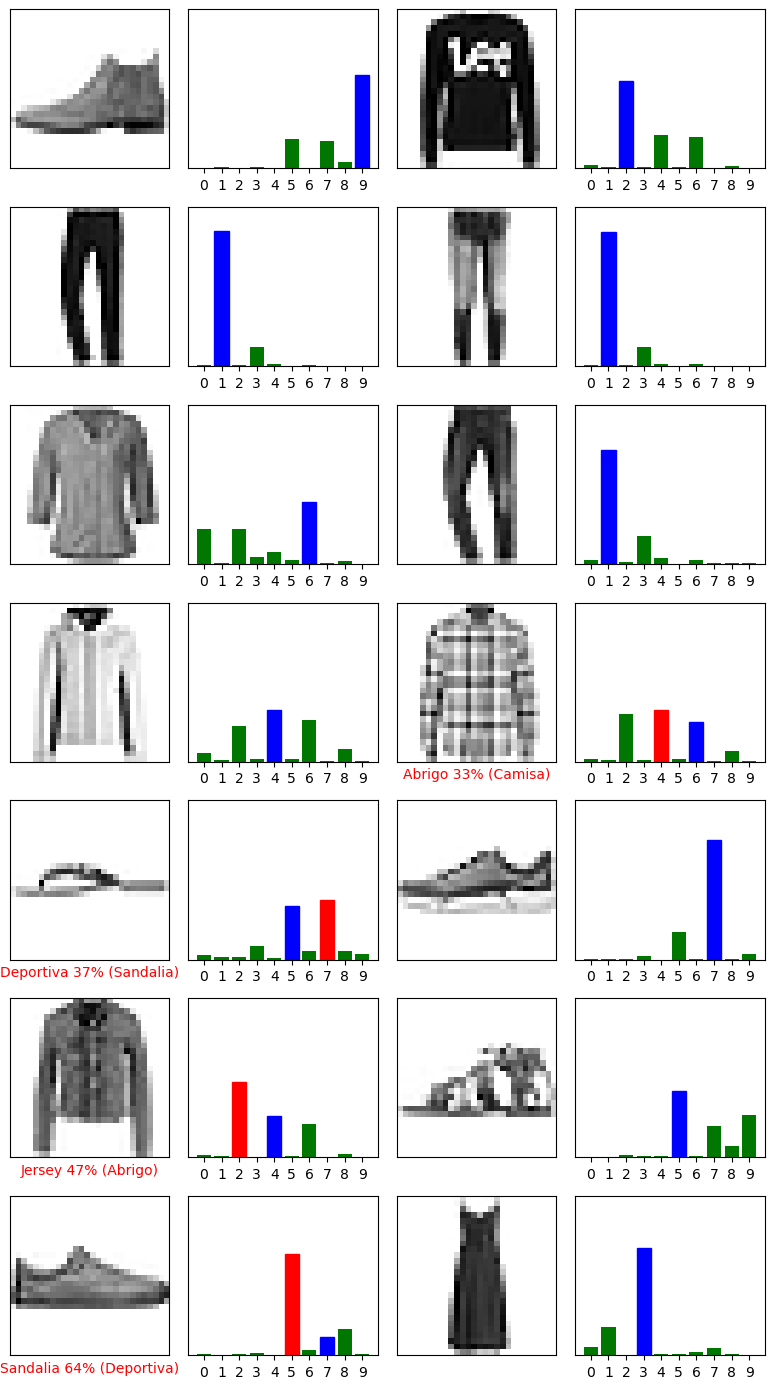

In [29]:
num_rows = 7 
num_cols = 2 
num_images = num_rows*num_cols 
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) 
for i in range(num_images): 
    plt.subplot(num_rows, 2*num_cols, 2*i+1) 
    plot_image(i, predictions[i], test_labels, test_images) 
    plt.subplot(num_rows, 2*num_cols, 2*i+2) 
    plot_value_array(i, predictions[i], test_labels) 
    plt.tight_layout()
plt.show()

 Las imágenes superiores son ejemplos de predicciones del modelo para el conjunto de datos Fashion-MNIST. Para cada imagen, el histograma representa la probabilidad de pertenencia de la clase correspondiente calculada por el modelo

### Mejora del modelo   

Se observa que la precisión obtenida de este modelo para estos datos (75 %) dista mucho de ser óptima. Podríamos decir que es un resultado esperado, puesto que no hay una solución única para todos los problemas, sino que cada problema requiere su propia solución.
Se procede a intentar, por ejemplo, cambiar el optimizador usado. Cabe recordar que el optimizador es el algoritmo usado por el modelo para actualizar los pesos de cada una de sus capas en el proceso de entrenamiento. Una elección bastante habitual es el optimizador **sgd**, pero hay muchos más, como por ejemplo el optimizador **Adam**, que suele hacer converger mejor el proceso de optimización.

In [30]:
# Reconstruimos la arquitectura del modelo
model = Sequential([ 
            Input(shape=(28,28)),
            Flatten(), 
            Dense(10, activation='sigmoid'),
            Dense(10, activation='softmax')
])


In [31]:
# Compilamos modificando el optimizador
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [32]:
# Entrenamos de nuevo
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5973 - loss: 1.4235
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8036 - loss: 0.6168
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8347 - loss: 0.4974
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8476 - loss: 0.4523
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8539 - loss: 0.4281


In [33]:
# Por último, evaluamos
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8486 - loss: 0.4406

Test accuracy: 0.843500018119812


Cambiando solo el optimizador ya hemos mejorado un 9 % adicional la precisión del modelo. Esto indica que hay muchos elementos a tener en cuenta cuando se define y configura el proceso de aprendizaje de una red neuronal.

## <img src="img/by-nc.png" width="200">